In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [17]:
def alteracaoHue(path, m, x):
    image = cv2.imread(path)
    # converte a imagem original para HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # faz o cálculo dos limites superiores e inferiores
    # com base em 180 por aspectos da bibilioteca cv22
    upper = np.mod((m + x)/2, 180)
    lower = np.mod((m - x)/2, 180)
    # cria matrizes booleanas de acordo com as condições

    # separa as matizes h, s e v
    h, s , v = cv2.split(image_hsv)

    # de começo e fim do círculo HSV delimitado pelo
    # usuário 
    start = h <= upper
    #print(start)
    end = h >= lower

    # realiza o casting para o tipo np.uint16
    h = h.astype(np.uint16)

    # delimita qual operação será usada dependendo da 
    # condição de que o limite inferior é menor do que 
    # o limite superior 
    operation = start & end if lower < upper else start | end
    # realiaza a operação (podendo ser união ou interseção)
    h[operation] = np.mod(h[operation] + 90, 180).astype(np.uint8)

    #volta para o valor normal
    h = h.astype(np.uint8)

    # após realizar as modificações, realiza o merge na imagem
    image_hsv = cv2.merge([h, s, v])

    # converte a imagem de volta para RGB
    image_final = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # mostra a imagem
    plt.figure(figsize = ((12, 6)))
    plt.subplot(1, 2, 1)
    plt.title("Imagem Original", fontsize = 16)
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.imshow(image_final)
    plt.title("Imagem Alterada", fontsize = 16)
    plt.show()

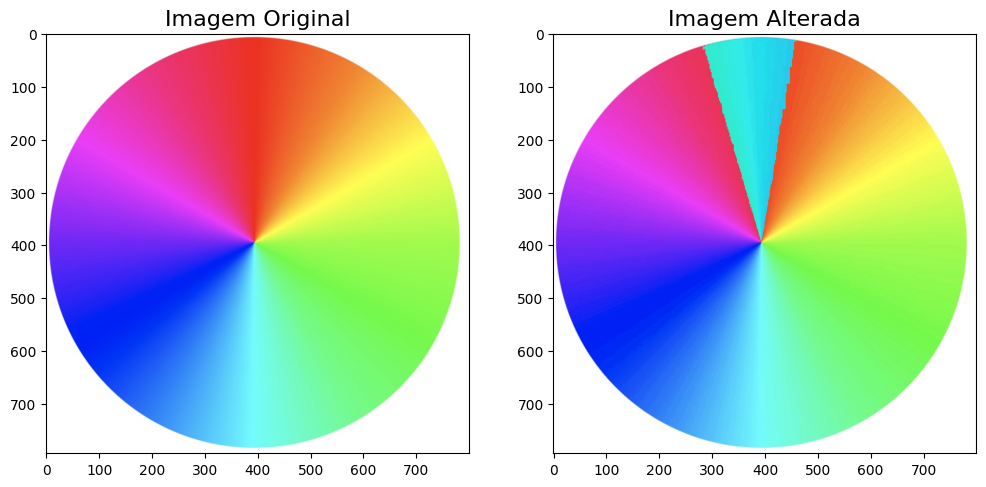

In [23]:
alteracaoHue('./circulo_cromatico.jpeg', 360, 10)

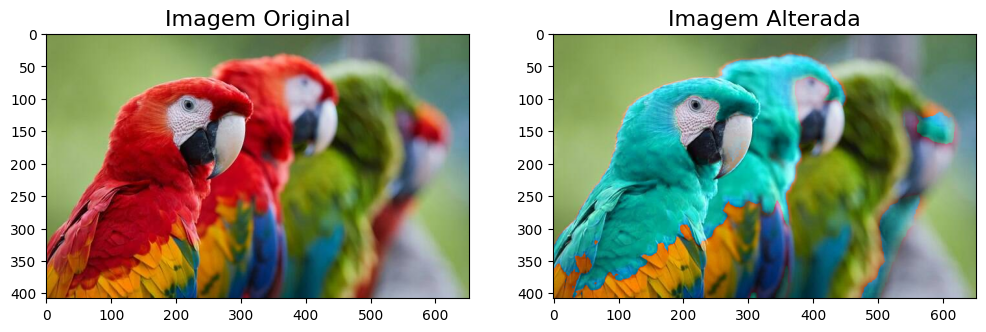

In [28]:
alteracaoHue('./aves.jpg', 0, 20)

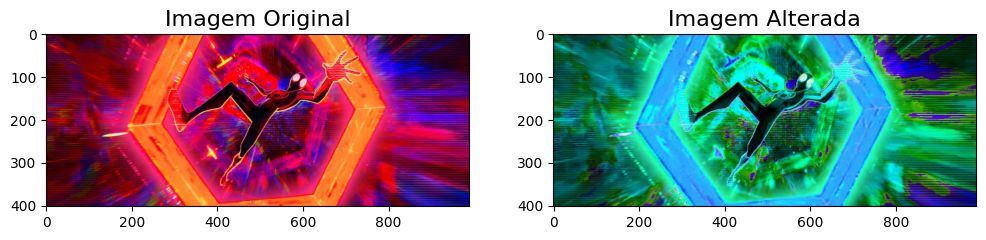

In [31]:
alteracaoHue('./aranhaverso.png', 360, 90)